In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data=pd.read_csv("F:\\breast-cancer-wisconsin-data\\data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.shape

(569, 33)

In [7]:
data['Unnamed: 32'].isnull().all()

True

In [15]:
data.drop(['Unnamed: 32'],axis=1,inplace=True)

In [16]:
data.shape

(569, 32)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [18]:
(data['diagnosis'].value_counts())/data.shape[0]

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

([<matplotlib.patches.Wedge at 0x2357884bf48>,
 [Text(-0.3228026293005679, -1.051569523387132, 'Benign'),
  Text(0.32280272775561086, 1.0515694931641641, 'Malign')],
 [Text(-0.17607416143667337, -0.5735833763929811, '62.7%'),
  Text(0.1760742151394241, 0.5735833599077259, '37.3%')])

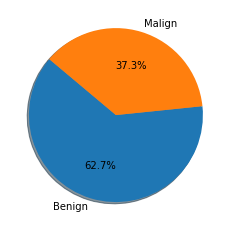

In [19]:
labels='Benign','Malign'
plt.pie(data['diagnosis'].value_counts(),labels=labels,autopct='%1.1f%%',shadow=True,startangle=140)

In [21]:
map_cat={'B':0,'M':1}

In [22]:
data['diagnosis']=data['diagnosis'].map(map_cat)

In [24]:
data.drop(['id'],axis=1,inplace=True)

In [25]:
x=data.iloc[:,1:]

In [26]:
y=data.iloc[:,0]

In [27]:
y.name

'diagnosis'

In [28]:
x.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:

#sns.heatmap(corr)
plt.figure(figsize = (10,7))
top_corr_features = corr.index[abs(corr["diagnosis"])>0.7]
sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [29]:
corr=data.corr()

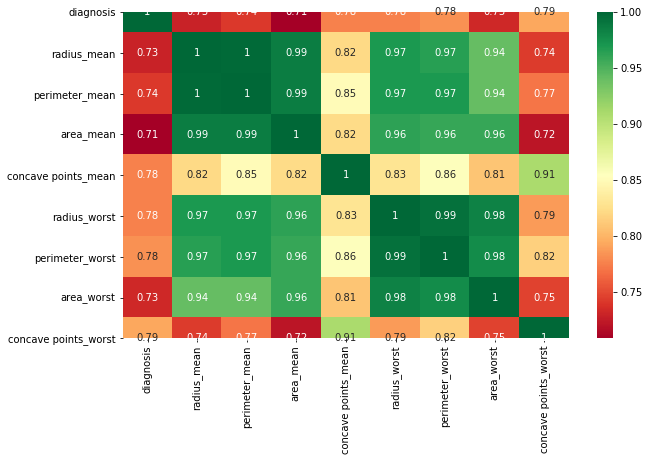

In [30]:
plt.figure(figsize=(10,6))
top_corr_feature=corr.index[abs(corr['diagnosis'])>0.7]
sns.heatmap(data[top_corr_feature].corr(),annot=True,cmap="RdYlGn")

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [33]:
x_train.shape[0],x_test.shape[0]

(426, 143)

In [35]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
std.fit(x_train)
x_train=std.transform(x_train)

In [36]:
x_train

array([[-0.65079907, -0.43057322, -0.68024847, ..., -0.36433881,
         0.32349851, -0.7578486 ],
       [-0.82835341,  0.15226547, -0.82773762, ..., -1.45036679,
         0.62563098, -1.03071387],
       [ 1.68277234,  2.18977235,  1.60009756, ...,  0.72504581,
        -0.51329768, -0.96601386],
       ...,
       [-1.33114223, -0.22172269, -1.3242844 , ..., -0.98806491,
        -0.69995543, -0.12266325],
       [-1.25110186, -0.24600763, -1.28700242, ..., -1.75887319,
        -1.56206114, -1.00989735],
       [-0.74662205,  1.14066273, -0.72203706, ..., -0.2860679 ,
        -1.24094654,  0.2126516 ]])

In [39]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(x_train,y_train)

C:\Users\shree1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
x_test=std.transform(x_test)

In [41]:
print("Accuarcy of Logistic Regression of training dataset:{:.2f}".format(clf.score(x_train,y_train)))
print("Accuarcy of Logistic Regression of test dataset:{:.2f}".format(clf.score(x_test,y_test)))

Accuarcy of Logistic Regression of training dataset:0.99
Accuarcy of Logistic Regression of test dataset:0.51


In [44]:
from sklearn import metrics
y_pred=clf.predict(x_test)
cnf_mat=metrics.confusion_matrix(y_test,y_pred)

In [45]:
cnf_mat

array([[44, 46],
       [24, 29]], dtype=int64)

In [52]:
print("Accuracy_Score:",metrics.accuracy_score(y_test,y_pred))
print("Precision_Score:",metrics.precision_score(y_test,y_pred))
print("Recall:",metrics.recall_score(y_test,y_pred))

Accuracy_Score: 0.5104895104895105
Precision_Score: 0.38666666666666666
Recall: 0.5471698113207547
